In [1]:
#kaggle competitions -c the bridgediamonds
# price price in US dollars (\$326--\$18,823)

#carat weight of the diamond (0.2--5.01)

#cut quality of the cut (Fair, Good, Very Good, Premium, Ideal) escala del 1(peor) al 5 (mejor)

#color diamond colour, from J (worst) to D (best)

#clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

#x length in mm (0--10.74)

#y width in mm (0--58.9)

#z depth in mm (0--31.8)

#depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

#table width of top of diamond relative to widest point (43--95)

In [56]:
import pandas as pd
import numpy as np
import pylab as plt

In [57]:
data_train=pd.read_csv(r'C:\Katherine_Classes\ds_tb_part_21_09-1\data\train.csv')

data_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,id
0,1.01,Very Good,F,SI2,62.2,58.0,4332.0,6.33,6.38,3.95,0
1,0.90,Very Good,I,VS2,61.4,58.0,4089.0,6.22,6.25,3.83,1
2,0.53,Ideal,E,VVS2,62.2,54.0,2273.0,5.19,5.23,3.24,2
3,0.32,Ideal,I,IF,60.8,54.0,673.0,4.44,4.47,2.71,3
4,1.06,Ideal,G,VVS2,61.0,57.0,7900.0,6.55,6.57,4.00,4


In [58]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35940 entries, 0 to 35939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    35940 non-null  float64
 1   cut      35940 non-null  object 
 2   color    35940 non-null  object 
 3   clarity  35940 non-null  object 
 4   depth    35940 non-null  float64
 5   table    35940 non-null  float64
 6   price    35940 non-null  float64
 7   x        35940 non-null  float64
 8   y        35940 non-null  float64
 9   z        35940 non-null  float64
 10  id       35940 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 3.0+ MB


In [59]:
data_test=pd.read_csv(r'C:\Katherine_Classes\ds_tb_part_21_09-1\data\test.csv')

data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,id
0,0.70,Good,J,VVS2,64.3,56.0,5.57,5.63,3.60,0
1,0.31,Premium,E,VVS2,61.9,58.0,4.38,4.35,2.70,1
2,0.84,Premium,F,SI1,59.0,59.0,6.18,6.13,3.63,2
3,1.03,Fair,E,SI1,65.1,58.0,6.35,6.24,4.10,3
4,1.20,Premium,J,SI1,60.5,59.0,6.84,6.79,4.12,4


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    12000 non-null  float64
 1   cut      12000 non-null  object 
 2   color    12000 non-null  object 
 3   clarity  12000 non-null  object 
 4   depth    12000 non-null  float64
 5   table    12000 non-null  float64
 6   x        12000 non-null  float64
 7   y        12000 non-null  float64
 8   z        12000 non-null  float64
 9   id       12000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 937.6+ KB


In [8]:
import warnings
warnings.simplefilter('ignore')


import pylab as plt
%matplotlib inline

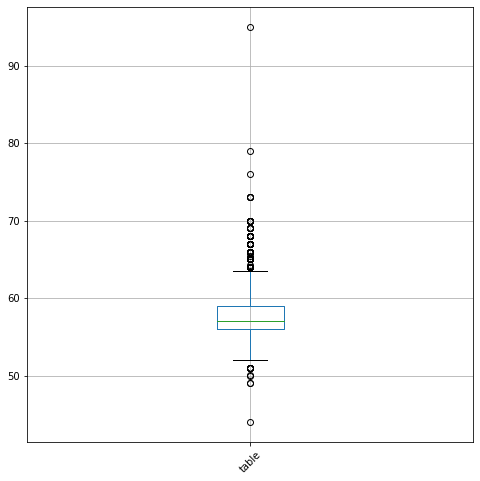

In [9]:
# outliers (3*iqr)

plt.figure(figsize=(8,8))

data_train.boxplot(column=['table'])

plt.xticks(rotation=45);

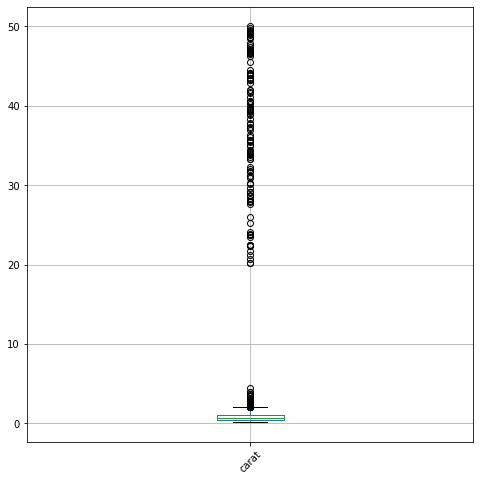

In [10]:
# outliers (3*iqr)

plt.figure(figsize=(8,8))

data_train.boxplot(column=['carat'])

plt.xticks(rotation=45);

In [11]:
data_train['cut'].unique()

array(['Very Good', 'Ideal', 'Good', 'Premium', 'Very Geod', 'Fair'],
      dtype=object)

In [12]:
data_train['cut']= data_train['cut'].apply(lambda x: x.replace('Very Geod', 'Very Good'))

In [13]:
data_train['cut'].unique()

array(['Very Good', 'Ideal', 'Good', 'Premium', 'Fair'], dtype=object)

In [14]:
data_train['color'].unique()

array(['F', 'I', 'E', 'G', 'H', 'J', 'D'], dtype=object)

In [15]:
data_train['clarity'].unique()

array(['SI2', 'VS2', 'VVS2', 'IF', 'SI1', 'VVS1', 'VS1', 'I1'],
      dtype=object)

In [22]:
clarity_= {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8} 

In [23]:
data_train['clarity']= data_train['clarity'].map(clarity_)

In [24]:
cut_={'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4,'Ideal':5}

In [25]:
data_train['cut']= data_train['cut'].map(cut_)

In [26]:
color_={'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

In [27]:
data_train['color']= data_train['color'].map(color_)

In [28]:
data_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,3,5,2,62.2,58.0,4332.0,6.33,6.38,3.95
1,0.90,3,2,4,61.4,58.0,4089.0,6.22,6.25,3.83
2,0.53,5,6,6,62.2,54.0,2273.0,5.19,5.23,3.24
3,0.32,5,2,8,60.8,54.0,673.0,4.44,4.47,2.71
4,1.06,5,4,6,61.0,57.0,7900.0,6.55,6.57,4.00


In [22]:
#data_train.shape

(35940, 11)

In [60]:
data_test['cut']= data_test['cut'].apply(lambda x: x.replace('Very Geod', 'Very Good'))

In [61]:
data_test['clarity']= data_test['clarity'].map(clarity_)
data_test['cut']= data_test['cut'].map(cut_)
data_test['color']= data_test['color'].map(color_)

In [62]:
id_test= data_test.id

In [63]:
data_test = data_test.drop(["id"], axis=1)
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.70,2,1,6,64.3,56.0,5.57,5.63,3.60
1,0.31,4,6,6,61.9,58.0,4.38,4.35,2.70
2,0.84,4,5,3,59.0,59.0,6.18,6.13,3.63
3,1.03,1,6,3,65.1,58.0,6.35,6.24,4.10
4,1.20,4,1,3,60.5,59.0,6.84,6.79,4.12


In [64]:
data_test.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.908924,3.903167,4.423750,4.032917,61.729000,57.468917,5.739475,5.741841,3.543692
std,2.036678,1.114926,1.703407,1.640139,1.416593,2.243374,1.125192,1.116722,0.741702
min,0.200000,1.000000,1.000000,1.000000,50.800000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,4.720000,4.730000,2.920000
50%,0.710000,4.000000,4.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.030000
max,48.262046,5.000000,7.000000,8.000000,71.200000,70.000000,10.140000,10.100000,31.800000


In [65]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    12000 non-null  float64
 1   cut      12000 non-null  int64  
 2   color    12000 non-null  int64  
 3   clarity  12000 non-null  int64  
 4   depth    12000 non-null  float64
 5   table    12000 non-null  float64
 6   x        12000 non-null  float64
 7   y        12000 non-null  float64
 8   z        12000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 843.9 KB


In [25]:
max_p=data_train['price'].max()
max_p

18823.0

In [26]:
max_carat=data_train['carat'].max()
max_carat

49.9903589324094

In [27]:
min_p=data_train['price'].min()
min_p

326.0

In [28]:
min_cut=data_train['cut'].min()
min_cut

1

In [29]:
min_x=data_train['x'].min()
min_x

0.0

In [30]:
min_y=data_train['y'].min()
min_y

0.0

In [31]:
min_z=data_train['z'].min()
min_z

0.0

In [33]:
#data_train.shape

(35927, 11)

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [18]:
import seaborn as sns

In [19]:
#Eliminando el indice
data_train = data_train.drop(["id"], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,Very Good,F,SI2,62.2,58.0,4332.0,6.33,6.38,3.95
1,0.90,Very Good,I,VS2,61.4,58.0,4089.0,6.22,6.25,3.83
2,0.53,Ideal,E,VVS2,62.2,54.0,2273.0,5.19,5.23,3.24
3,0.32,Ideal,I,IF,60.8,54.0,673.0,4.44,4.47,2.71
4,1.06,Ideal,G,VVS2,61.0,57.0,7900.0,6.55,6.57,4.00


In [38]:
# copia de los datos originales
data_copy = data_train.copy()

In [29]:
data_train.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000
mean,0.907500,3.904897,4.396272,4.058932,61.756210,57.461753,3930.117835,5.728928,5.731430,3.537112
std,2.098015,1.115906,1.699530,1.648053,1.431872,2.240414,3982.706797,1.121504,1.121685,0.695298
min,0.200000,1.000000,1.000000,1.000000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.100000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.900000,57.000000,2394.000000,5.690000,5.710000,3.520000
75%,1.050000,5.000000,6.000000,5.000000,62.500000,59.000000,5362.250000,6.540000,6.540000,4.040000
max,49.990359,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.230000,31.800000,6.720000


<AxesSubplot:>

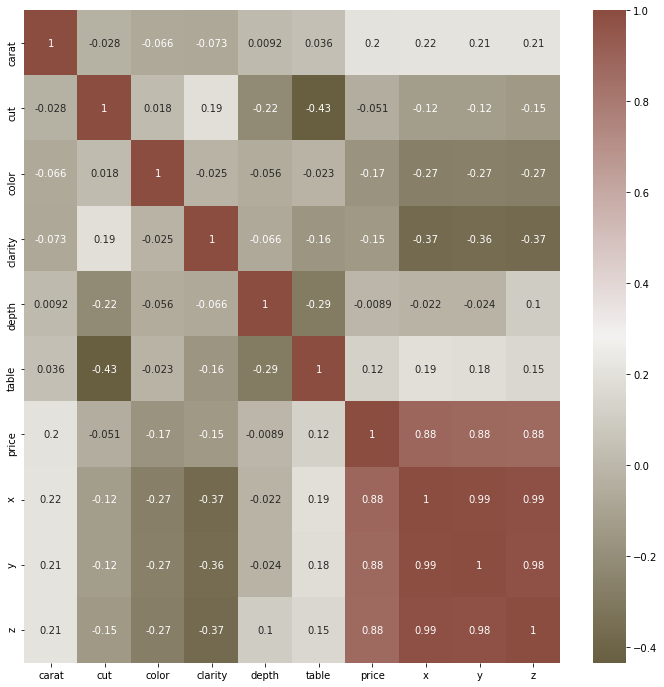

In [30]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= data_train.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [41]:
from sklearn.pipeline import Pipeline

In [31]:
# asignando caracteristicas como X y el valor buscado como y
X= data_train.drop(["price"],axis =1)
y= data_train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [36]:
X_train.shape, X_test.shape, y_train.shape,  y_test.shape

((26955, 9), (8985, 9), (26955,), (8985,))

In [37]:
rf= RandomForestRegressor() #inicializamos la variable

In [39]:
rf.fit(X_train,y_train) #Entrenamos el modelo

RandomForestRegressor()

In [40]:
rf.score(X_train,y_train) #Sacamos el Score del train

0.9970667378190037

In [41]:
rf.score(X_test,y_test) #Sacamos el score del test

0.9800702857217909

In [42]:
rf.fit(X,y) #Entrenamos el modelo completo

RandomForestRegressor()

In [43]:
rf.score(X,y) #Vemos el score del modelo completo 

0.9972177057845117

In [46]:
predict= rf.predict(X_test) #Hacemos una predicción

In [45]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y_test, predict, squared=False) #vemos el mse de mi predicción

205.374660770067

In [66]:
predict_test =rf.predict(data_test) #Ahora si hacemos la predicción del data test

In [67]:
solution =pd.DataFrame() #creamos el dataframe

In [68]:
solution['price'] = predict_test #sacamos el precio del predict_test

In [69]:
solution['id'] = id_test #sacamos el id previamente guardado del data_test

In [70]:
solution

,price,id
0,1841.43,0
1,1027.43,1
2,3175.60,2
3,4790.07,3
4,4713.03,4
...,...,...
11995,7983.56,11995
11996,1022.09,11996
11997,15579.07,11997
11998,5256.29,11998


In [71]:
solution.to_csv('prediction_1.csv',index =False) #creamos el csv